In [1]:
#install libraries and packages to use with environment for analysis

import pandas as pd # used to provide tools to explore, clean, and analyze data.
import numpy as np # used to work with arrays
import matplotlib.pyplot as plt # used for visualizations
%matplotlib inline
from sklearn.decomposition import PCA # used for PCA computations
import seaborn as sns # used for visualizations
import missingno as msno # used to visualizations for missing data, NA, Nulls

In [2]:
#import the telecommunications churn dataset csv file to be used. 
#view dataset to ensure proper loading.

churn = pd.read_csv('churn_raw_data.csv')
pd.set_option('display.max_columns', None)
churn.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [3]:
#rename item 1-8 as easily identifiable variable names

churn = churn.rename(columns = { "item1": "Timely_Respd", "item2": "Timely_Fixes",
                                "item3": "Timely_Replc", "item4": "Reliability", "item5": "Options",
                                "item6": "Respect_Resp", "item7": "Courteous_Exch", 
                                "item8": "Evidence_ActListen"})

In [4]:
# creation of an index for the dataset
churn['Index'] = pd.Series(range(0,10000))

In [5]:
#detection of duplicates, first by visual of variables within dataset.

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [6]:
#use the duplicated function to find duplicates within the rows

churn.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
duplicates = churn.duplicated('Customer_id', keep=False)

In [8]:
churn_duplicated =churn[duplicates].sort_values(by='Customer_id')

In [9]:
print(churn_duplicated[['Customer_id']])

Empty DataFrame
Columns: [Customer_id]
Index: []


In [10]:
#use describe function to overview for missing data
#review values to detect inherent missing/invalid values within dataframe

churn.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen,Index
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,4999.50000
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,2886.89568
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2499.75000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4999.50000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,7499.25000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,9999.00000


In [11]:
#analyze the missing values.

churn.isnull()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen,Index
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#find the total of the missing values

churn.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [13]:
#find the percentage of missing values

churn.isnull().mean() * 100

Unnamed: 0               0.00
CaseOrder                0.00
Customer_id              0.00
Interaction              0.00
City                     0.00
State                    0.00
County                   0.00
Zip                      0.00
Lat                      0.00
Lng                      0.00
Population               0.00
Area                     0.00
Timezone                 0.00
Job                      0.00
Children                24.95
Age                     24.75
Education                0.00
Employment               0.00
Income                  24.90
Marital                  0.00
Gender                   0.00
Churn                    0.00
Outage_sec_perweek       0.00
Email                    0.00
Contacts                 0.00
Yearly_equip_failure     0.00
Techie                  24.77
Contract                 0.00
Port_modem               0.00
Tablet                   0.00
InternetService          0.00
Phone                   10.26
Multiple                 0.00
OnlineSecu

In [14]:
# locating values and volumes of outliers : 
#used IQR based on code to create a function from: https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
def find_outliers(df, var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    IQR = q3 - q1
    lowerbound = q1-(1.5*IQR)
    upperbound = q3+(1.5*IQR)
    outliers = df[var][((df[var] < (lowerbound)) | (df[var] > (upperbound)))]
    return outliers

In [15]:
#run the newly created function on each quantitative variable

outliers = find_outliers(churn, 'Children')
print("number of outliers in Children: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Children: 302
max outlier value: 10.0
min outlier value: 8.0


In [16]:
outliers = find_outliers(churn, 'Age')
print("number of outliers in Age: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Age: 0
max outlier value: nan
min outlier value: nan


In [17]:
outliers = find_outliers(churn,'Income')
print("number of outliers in Income: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Income: 249
max outlier value: 258900.7
min outlier value: 104867.5


In [21]:
outliers = find_outliers(churn, 'Population')
print("number of outliers in Population: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Population: 937
max outlier value: 111850
min outlier value: 31816


In [22]:
outliers = find_outliers(churn, 'MonthlyCharge')
print("number of outliers in MonthlyCharge: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in MonthlyCharge: 5
max outlier value: 315.8786
min outlier value: 298.1730235


In [23]:
outliers = find_outliers(churn, 'Email')
print("number of outliers in Email: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Email: 38
max outlier value: 23
min outlier value: 1


In [24]:
outliers = find_outliers(churn, 'Tenure')
print("number of outliers in Tenure: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Tenure: 0
max outlier value: nan
min outlier value: nan


In [25]:
outliers = find_outliers(churn, 'Bandwidth_GB_Year')
print("number of outliers in Bandwidth GB per Year: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Bandwidth GB per Year: 0
max outlier value: nan
min outlier value: nan


In [26]:
outliers = find_outliers(churn, 'Outage_sec_perweek')
print("number of outliers in Outage seconds per week: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Outage seconds per week: 539
max outlier value: 47.04928
min outlier value: -1.348571


In [27]:
outliers = find_outliers(churn, 'Yearly_equip_failure')
print("number of outliers in Yearly equipment failure: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Yearly equipment failure: 94
max outlier value: 6
min outlier value: 3


In [28]:
outliers = find_outliers(churn, 'Contacts')
print("number of outliers in Contacts: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Contacts: 8
max outlier value: 7
min outlier value: 6


In [29]:
#treat the inherent missing values/data anomalies as noted during detection stage. 
churn.Population = churn.Population.replace(0, np.nan)
churn.Outage_sec_perweek = np.where(churn.Outage_sec_perweek < 0, 
                                    np.nan, churn.Outage_sec_perweek)

In [30]:
#visualize and treat missing data.
churn.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                97
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek        11
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

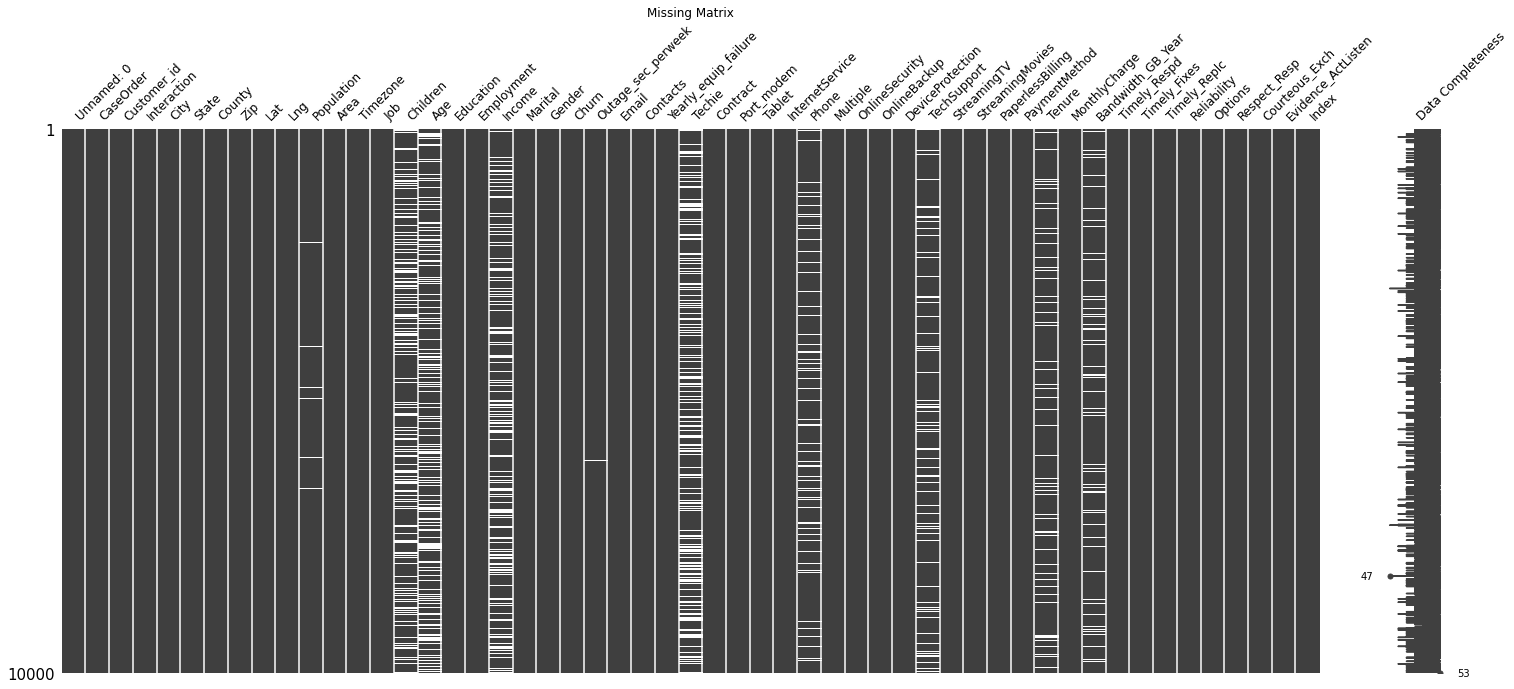

In [31]:
#use the missingno matrix, 

msno.matrix(churn, fontsize = 12, labels=True)
plt.title('Missing Matrix')
plt.show()

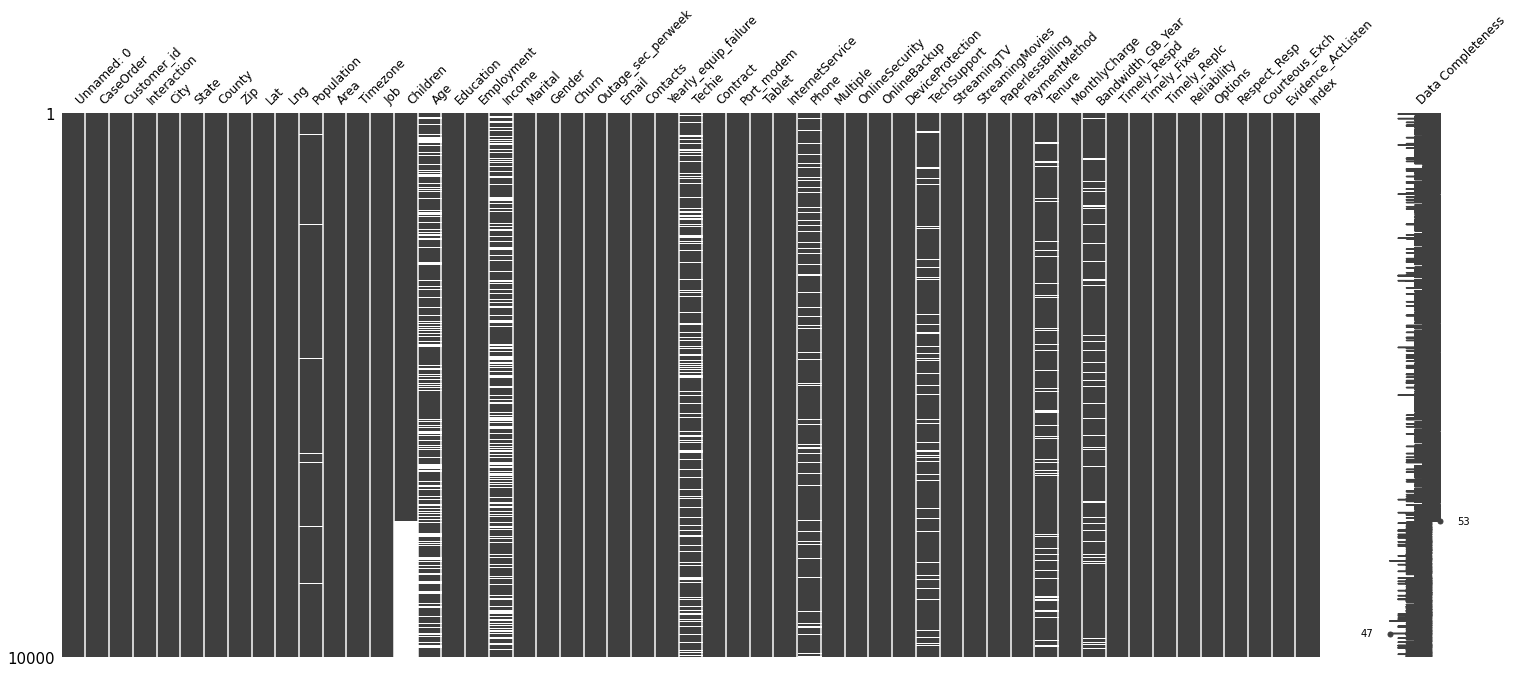

In [32]:
#sorting to detect what type of missing data.

sorted = churn.sort_values('Children')
msno.matrix(sorted, fontsize = 12, labels=True)
plt.show()

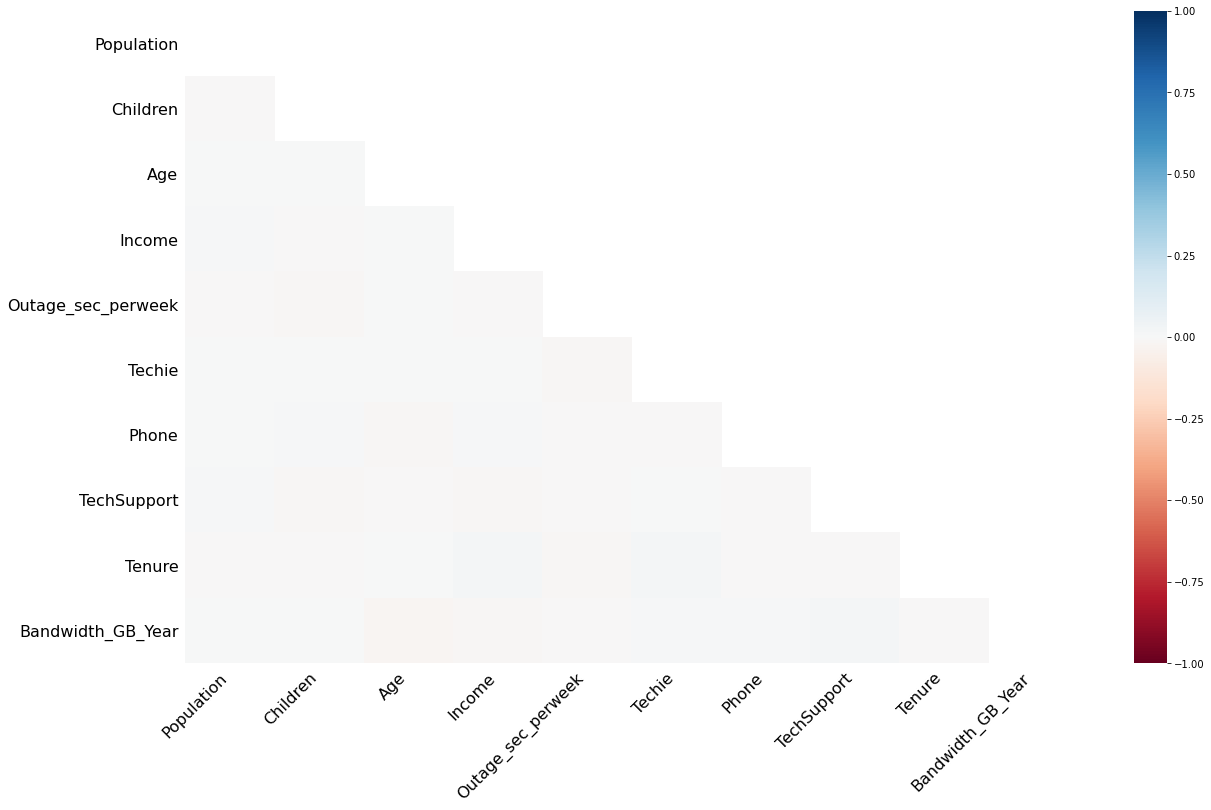

In [33]:
#visualizing the correlation between the missing values. 

msno.heatmap(churn)
plt.show()

In [34]:
# deletion of Population/ Outage seconds per week rows with missing values due to MCAR, % < 5%
churn.dropna(subset=['Population'], how='all', inplace=True)
churn.dropna(subset=['Outage_sec_perweek'], how='all', inplace=True)

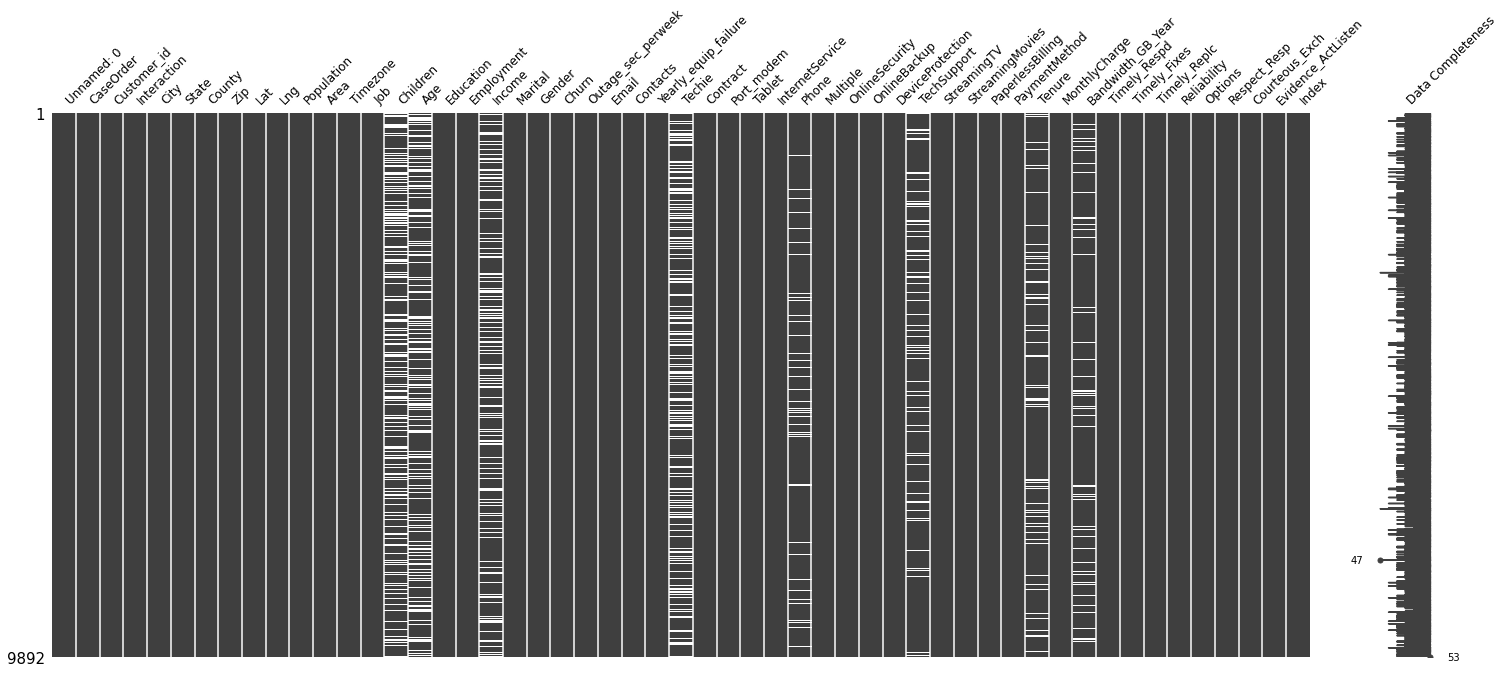

In [35]:
#visualizing this change.
msno.matrix(churn, fontsize = 12, labels=True)
plt.show()

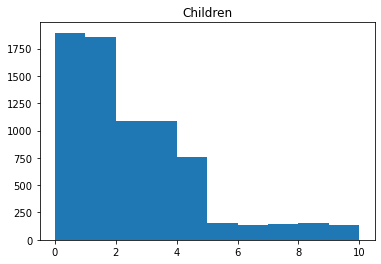

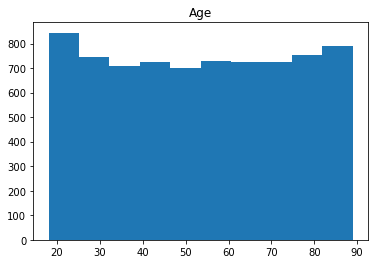

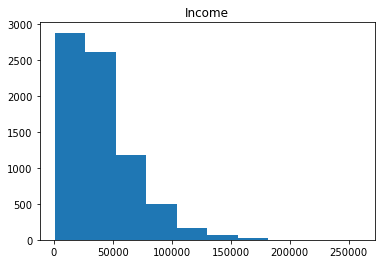

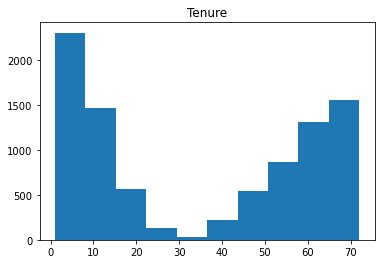

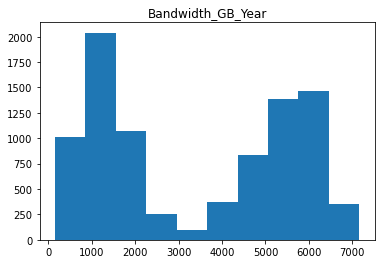

In [36]:
# create a histogram of each quantitative variables that have missing data to examine distrubition shapes. 

plt.hist(churn.Children)
plt.title('Children')
plt.show()
plt.hist(churn.Age)
plt.title('Age')
plt.show()
plt.hist(churn.Income)
plt.title('Income')
plt.show()
plt.hist(churn.Tenure)
plt.title('Tenure')
plt.show()
plt.hist(churn.Bandwidth_GB_Year)
plt.title('Bandwidth_GB_Year')
plt.show()

In [37]:
#using univariate imputation to fill missing data.
#using mean for normal distro, median for skewed, mode for qualitative/categorical
churn.Children.fillna(churn.Children.median(), inplace=True)
churn.Age.fillna(churn.Age.median(), inplace=True)
churn.Income.fillna(churn.Income.median(), inplace=True)
churn.Tenure.fillna(churn.Tenure.median(), inplace=True)
churn.Bandwidth_GB_Year.fillna(churn.Bandwidth_GB_Year.median(), inplace=True)

#categorical use the mode for missing values
churn.TechSupport = churn.TechSupport.fillna(churn.TechSupport.mode()[0])
churn.Techie = churn.Techie.fillna(churn.Techie.mode()[0])
churn.Phone = churn.Phone.fillna(churn.Phone.mode()[0])

In [38]:
#rerun the isnull to ensure all the missing data is resolved.

churn.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

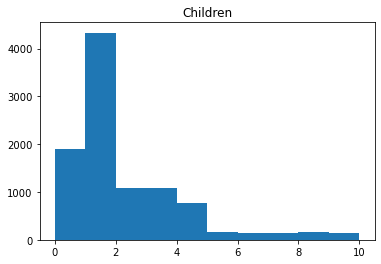

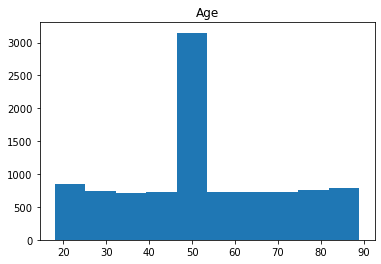

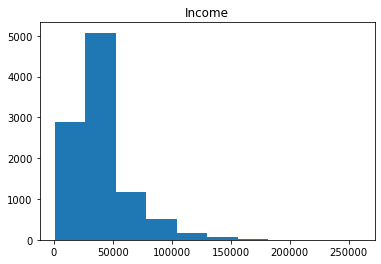

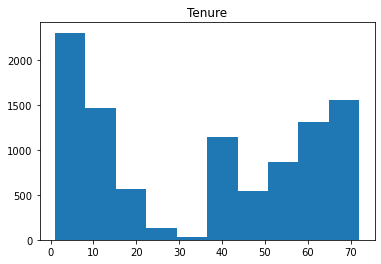

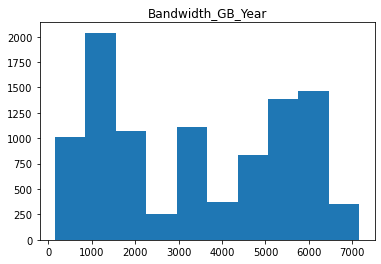

In [39]:
#reshowing the distrubitions to make sure that the distribution types have not changed.
plt.hist(churn.Children)
plt.title('Children')
plt.show()
plt.hist(churn.Age)
plt.title('Age')
plt.show()
plt.hist(churn.Income)
plt.title('Income')
plt.show()
plt.hist(churn.Tenure)
plt.title('Tenure')
plt.show()
plt.hist(churn.Bandwidth_GB_Year)
plt.title('Bandwidth_GB_Year')
plt.show()

In [40]:
#treat my outliers, first view the shape of the dataframe
churn.shape

(9892, 53)

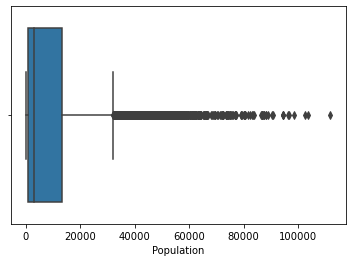

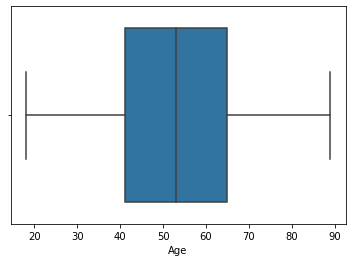

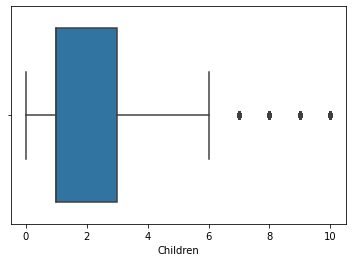

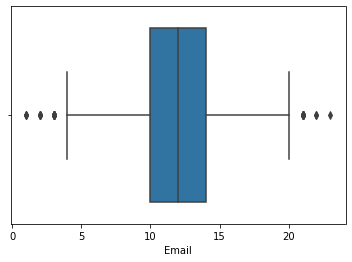

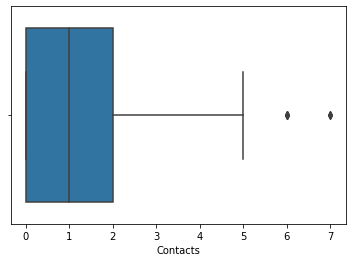

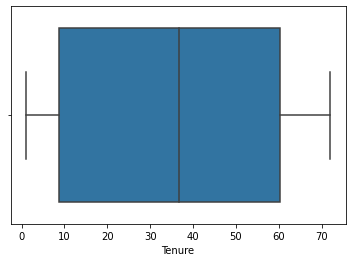

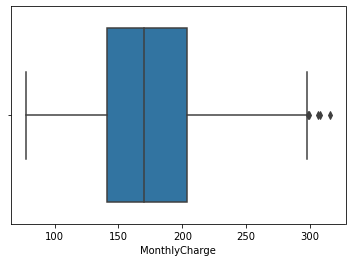

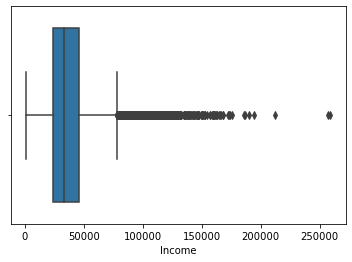

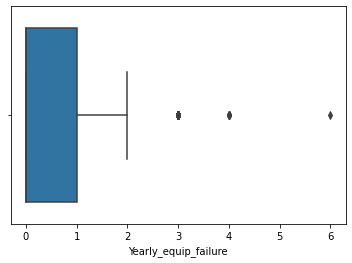

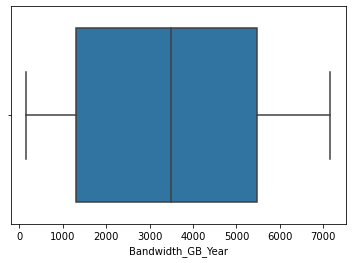

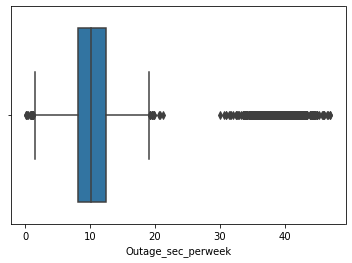

In [41]:
#boxplot all of the quantative variables.

boxplot=sns.boxplot(x='Population',data=churn)
plt.show()
boxplot=sns.boxplot(x='Age',data=churn)
plt.show()
boxplot=sns.boxplot(x='Children',data=churn)
plt.show()
boxplot=sns.boxplot(x='Email',data=churn)
plt.show()
boxplot=sns.boxplot(x='Contacts',data=churn)
plt.show()
boxplot=sns.boxplot(x='Tenure',data=churn)
plt.show()
boxplot=sns.boxplot(x='MonthlyCharge',data=churn)
plt.show()
boxplot=sns.boxplot(x='Income',data=churn)
plt.show()
boxplot=sns.boxplot(x='Yearly_equip_failure',data=churn)
plt.show()
boxplot=sns.boxplot(x='Bandwidth_GB_Year',data=churn)
plt.show()
boxplot=sns.boxplot(x='Outage_sec_perweek',data=churn)
plt.show()

In [42]:
def find_boundary(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    return lower , upper

In [43]:
lower_pop, upper_pop = find_boundary(churn, 'Population' )
print("Upper limit for population is" , upper_pop)
print("Lower limit for population is" , lower_pop)
churn.Population = np.where(churn.Population > upper_pop, upper_pop,
                               np.where(churn.Population < lower_pop, lower_pop, churn.Population))

Upper limit for population is 32096.125
Lower limit for population is -18016.875


In [44]:
lower_eml, upper_eml = find_boundary(churn, 'Email')
print("Upper limit for email is" , upper_eml)
print("Lower limit for email is" , lower_eml)
churn.Email = np.where(churn.Email > upper_eml, upper_eml,
                               np.where(churn.Email < lower_eml, lower_eml, churn.Email))

Upper limit for email is 20.0
Lower limit for email is 4.0


In [45]:
lower_contct, upper_contct = find_boundary(churn, 'Contacts')
print("Upper limit for contacts is" , upper_contct)
print("Lower limit for contacts is" , lower_contct)
churn.Contacts = np.where(churn.Contacts > upper_contct, upper_contct,
                               np.where(churn.Contacts < lower_contct, lower_contct, churn.Contacts))

Upper limit for contacts is 5.0
Lower limit for contacts is -3.0


In [46]:
lower_mc, upper_mc = find_boundary(churn, 'MonthlyCharge')
print("Upper limit for MonthlyCharge is" , upper_mc)
print("Lower limit for MonthlyCharge is" , lower_mc)
churn.MonthlyCharge = np.where(churn.MonthlyCharge > upper_mc, upper_mc,
                               np.where(churn.MonthlyCharge < lower_mc, lower_mc, churn.MonthlyCharge))


Upper limit for MonthlyCharge is 297.81091268750004
Lower limit for MonthlyCharge is 47.20501238749998


In [47]:
lower_inc, upper_inc = find_boundary(churn, 'Income')
print("Upper limit for Income is" , upper_inc)
print("Lower limit for Income is" , lower_inc)
churn.Income = np.where(churn.Income > upper_inc, upper_inc,
                               np.where(churn.Income < lower_inc, lower_inc, churn.Income))


Upper limit for Income is 78175.04375
Lower limit for Income is -9089.386249999996


In [48]:
lower_yef, upper_yef = find_boundary(churn, 'Yearly_equip_failure')
print("Upper limit for Yearly_equip_failure is" , upper_yef)
print("Lower limit for Yearly_equip_failure is" , lower_yef)
churn.Yearly_equip_failure = np.where(churn.Yearly_equip_failure > upper_yef, upper_yef,
                               np.where(churn.Yearly_equip_failure < lower_yef, lower_yef, churn.Yearly_equip_failure))


Upper limit for Yearly_equip_failure is 2.5
Lower limit for Yearly_equip_failure is -1.5


In [49]:
lower_osp, upper_osp = find_boundary(churn, 'Outage_sec_perweek')
print("Upper limit for Outage_sec_perweek is" , upper_osp)
print("Lower limit for Outage_sec_perweek is" , lower_osp)
churn.Outage_sec_perweek = np.where(churn.Outage_sec_perweek > upper_osp, upper_osp,
                               np.where(churn.Outage_sec_perweek < lower_osp, lower_osp, churn.Outage_sec_perweek))


Upper limit for Outage_sec_perweek is 19.14157157575
Lower limit for Outage_sec_perweek is 1.4259273737500004


In [50]:
lower_kid, upper_kid = find_boundary(churn, 'Children')
print("Upper limit for children is" , upper_kid)
print("Lower limit for children is" , lower_kid)
churn.Children = np.where(churn.Children > upper_kid, upper_kid,
                               np.where(churn.Children < lower_kid, lower_kid, churn.Children))

Upper limit for children is 6.0
Lower limit for children is -2.0


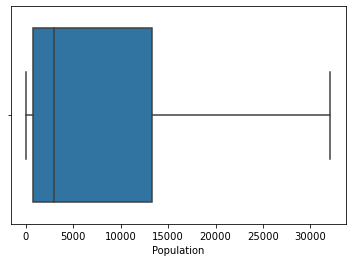

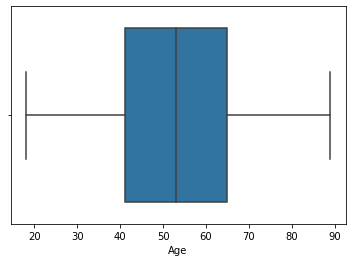

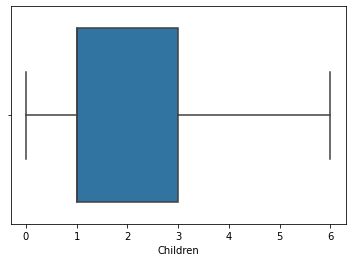

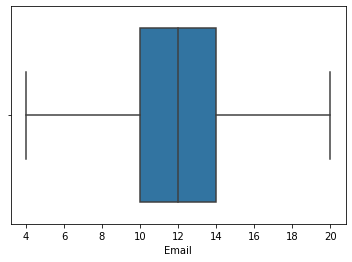

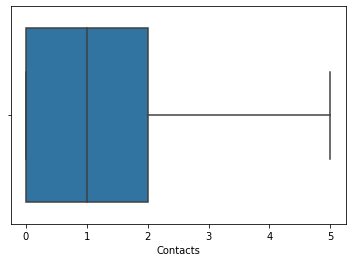

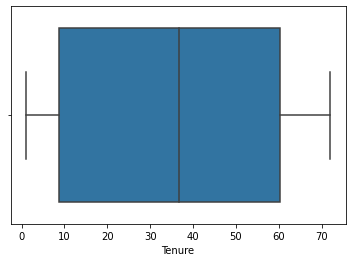

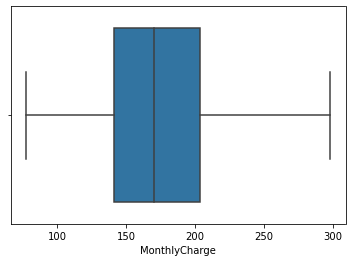

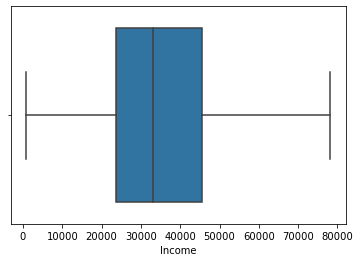

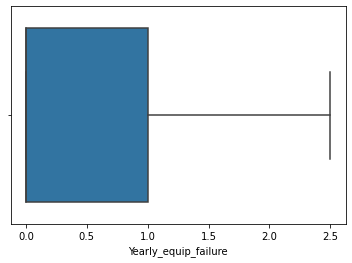

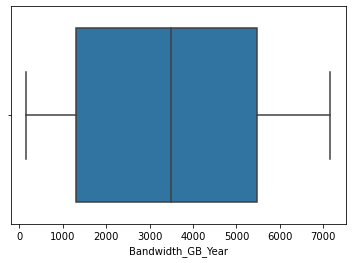

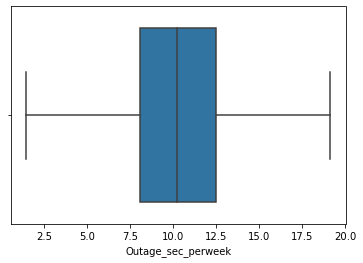

In [51]:
boxplot=sns.boxplot(x='Population',data=churn)
plt.show()
boxplot=sns.boxplot(x='Age',data=churn)
plt.show()
boxplot=sns.boxplot(x='Children',data=churn)
plt.show()
boxplot=sns.boxplot(x='Email',data=churn)
plt.show()
boxplot=sns.boxplot(x='Contacts',data=churn)
plt.show()
boxplot=sns.boxplot(x='Tenure',data=churn)
plt.show()
boxplot=sns.boxplot(x='MonthlyCharge',data=churn)
plt.show()
boxplot=sns.boxplot(x='Income',data=churn)
plt.show()
boxplot=sns.boxplot(x='Yearly_equip_failure',data=churn)
plt.show()
boxplot=sns.boxplot(x='Bandwidth_GB_Year',data=churn)
plt.show()
boxplot=sns.boxplot(x='Outage_sec_perweek',data=churn)
plt.show()

In [52]:
churn.shape

(9892, 53)

In [53]:
#re-expression of categorical data.
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9892 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9892 non-null   int64  
 1   CaseOrder             9892 non-null   int64  
 2   Customer_id           9892 non-null   object 
 3   Interaction           9892 non-null   object 
 4   City                  9892 non-null   object 
 5   State                 9892 non-null   object 
 6   County                9892 non-null   object 
 7   Zip                   9892 non-null   int64  
 8   Lat                   9892 non-null   float64
 9   Lng                   9892 non-null   float64
 10  Population            9892 non-null   float64
 11  Area                  9892 non-null   object 
 12  Timezone              9892 non-null   object 
 13  Job                   9892 non-null   object 
 14  Children              9892 non-null   float64
 15  Age                  

In [54]:
churn.Marital.unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [55]:
churn['Marital_Num'] = churn.Marital

In [56]:
marital_dict = {'Marital_Num':{'Widowed': 1, 'Married': 2, 'Separated': 1, 'Never Married': 1, 'Divorced': 1}}

In [57]:
churn.replace(marital_dict,inplace=True)

In [58]:
churn.InternetService.unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [59]:
churn['InternetService_Num'] = churn.InternetService

In [60]:
intservc_dict = {'InternetService_Num':{'Fiber Optic':1, 'DSL':1, 'None':0}}

In [61]:
churn.replace(intservc_dict,inplace=True)

In [62]:
churn.Phone.unique()

array(['Yes', 'No'], dtype=object)

In [63]:
churn['Phone_Num'] = churn.Phone

In [64]:
phone_dict = {'Phone_Num':{'Yes': 1, 'No': 0}}

In [65]:
churn.replace(phone_dict,inplace=True)

In [66]:
churn.OnlineSecurity.unique()

array(['Yes', 'No'], dtype=object)

In [67]:
churn['OnlineSecurity_Num'] = churn.OnlineSecurity

In [68]:
onsec_dict = {'OnlineSecurity_Num':{'Yes': 1, 'No': 0}}

In [69]:
churn.replace(onsec_dict,inplace=True)

In [70]:
churn.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

In [71]:
churn['OnlineBackup_Num'] = churn.OnlineBackup

In [72]:
onbk_dict = {'OnlineBackup_Num':{'Yes': 1, 'No': 0}}

In [73]:
churn.replace(onbk_dict,inplace=True)

In [74]:
churn.DeviceProtection.unique()

array(['No', 'Yes'], dtype=object)

In [75]:
churn['DeviceProtection_Num'] = churn.DeviceProtection

In [76]:
dvpro_dict = {'DeviceProtection_Num':{'Yes': 1, 'No': 0}}

In [77]:
churn.replace(dvpro_dict,inplace=True)

In [78]:
churn.TechSupport.unique()

array(['No', 'Yes'], dtype=object)

In [79]:
churn['TechSupport_Num'] = churn.TechSupport

In [80]:
tech_dict = {'TechSupport_Num':{'Yes': 1, 'No': 0}}

In [81]:
churn.replace(tech_dict,inplace=True)

In [82]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9892 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9892 non-null   int64  
 1   CaseOrder             9892 non-null   int64  
 2   Customer_id           9892 non-null   object 
 3   Interaction           9892 non-null   object 
 4   City                  9892 non-null   object 
 5   State                 9892 non-null   object 
 6   County                9892 non-null   object 
 7   Zip                   9892 non-null   int64  
 8   Lat                   9892 non-null   float64
 9   Lng                   9892 non-null   float64
 10  Population            9892 non-null   float64
 11  Area                  9892 non-null   object 
 12  Timezone              9892 non-null   object 
 13  Job                   9892 non-null   object 
 14  Children              9892 non-null   float64
 15  Age                  

In [83]:
# define variables for the pca
churn_df = churn[['Population', 'Income', 'MonthlyCharge', 'Children', 'Age', 
                  'Contacts', 'Email', 'Yearly_equip_failure','Outage_sec_perweek',
                  'Bandwidth_GB_Year', 'Tenure']]

In [84]:
churn_df.head()

,Population,Income,MonthlyCharge,Children,Age,Contacts,Email,Yearly_equip_failure,Outage_sec_perweek,Bandwidth_GB_Year,Tenure
0,38.0,28561.99,171.449762,1.0,68.0,0.0,10.0,1.0,6.972566,904.536110,6.795513
1,10446.0,21704.77,242.948015,1.0,27.0,0.0,12.0,1.0,12.014541,800.982766,1.156681
2,3735.0,33168.88,159.440398,4.0,50.0,0.0,9.0,1.0,10.245616,2054.706961,15.754144
3,13863.0,18925.23,120.249493,1.0,48.0,2.0,15.0,0.0,15.206193,2164.579412,17.087227
4,11352.0,40074.19,150.761216,0.0,83.0,2.0,16.0,1.0,8.960316,271.493436,1.670972


In [85]:
churn_df_norm= (churn_df - churn_df.mean())/churn_df.std()

In [86]:
pca = PCA(n_components=churn_df.shape[1])

In [87]:
pca.fit(churn_df_norm)

PCA(n_components=11)

In [88]:
churn_pca = pd.DataFrame(pca.transform(churn_df_norm), 
                         columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
                                  'PC8', 'PC9','PC10', 'PC11'])

In [89]:
print(pca.explained_variance_ratio_)

[0.17240879 0.1001559  0.09583426 0.09254364 0.09119895 0.09017061
 0.09003722 0.08873117 0.08791939 0.08158073 0.00941934]


In [90]:
print(pca.explained_variance_ratio_.cumsum())

[0.17240879 0.27256469 0.36839895 0.46094259 0.55214154 0.64231215
 0.73234937 0.82108054 0.90899993 0.99058066 1.        ]


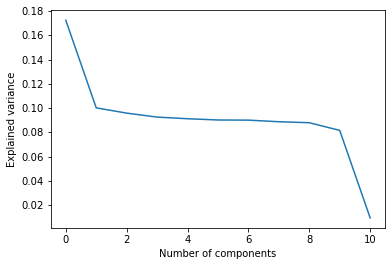

In [91]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [92]:
cov_matrix = np.dot(churn_df_norm.T, churn_df_norm)/churn_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

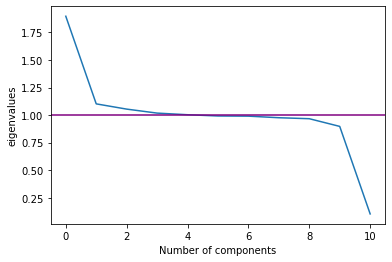

In [93]:
plt.plot(eigenvalues)
plt.xlabel('Number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="purple")
plt.show()

In [94]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
         'PC8', 'PC9','PC10', 'PC11'],
index=churn_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,-0.009518,-0.074293,-0.417858,-0.316784,0.051284,0.290441,0.620591,-0.261549,0.422752,-0.013608,0.000863
Income,0.001668,-0.085197,0.201347,0.206349,-0.791356,0.270167,0.241103,-0.273822,-0.272476,0.055054,0.000417
MonthlyCharge,0.046539,0.692582,-0.070491,0.040812,-0.061298,-0.032134,-0.051360,-0.128883,0.130955,0.684174,-0.047410
Children,-0.002177,0.045458,0.496351,-0.190809,-0.096682,0.542732,-0.191342,0.357609,0.496278,-0.009835,-0.019152
Age,-0.013039,-0.044869,-0.269786,0.593133,0.147840,0.389541,-0.409013,-0.399424,0.232993,-0.134412,0.021053
Contacts,0.005780,0.015477,-0.429081,0.440293,-0.184172,0.054764,0.202954,0.734281,0.051131,0.043079,-0.003312
Email,-0.021479,0.058592,-0.398242,-0.434689,0.003295,0.506976,-0.313883,0.110481,-0.527536,0.049717,0.004900
Yearly_equip_failure,0.013233,0.067401,0.342884,0.289990,0.546126,0.367419,0.445215,0.030538,-0.380900,0.127000,-0.002411
Outage_sec_perweek,0.020645,0.701071,0.008448,-0.000141,-0.062654,0.007315,0.109714,-0.011600,-0.056237,-0.699041,-0.005392
Bandwidth_GB_Year,0.706868,-0.006392,-0.000521,-0.016545,-0.003997,0.010300,-0.005785,0.006286,0.006482,0.007942,0.706911


In [95]:
churn.to_csv(r'TelecomDC_clean.csv')